In [71]:
# Import Libraries
import pandas as pd
import numpy as np
from copy import deepcopy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, auc, roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
def plotPrecisionRecall(y, yPred):
    precision, recall, threshold = precision_recall_curve(y, yPred)
    
    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, marker='.', color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve')
    plt.grid()
    plt.show()

def plotROC(y, yPred):
    fpr, tpr, _ = roc_curve(y, yPred)
    AUC = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'(AUC = {AUC:.4f})')
    plt.plot(['Negative', 'Positive'], ['Negative', 'Positive'], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

def confusionMatrix(y, yPred):
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix(y, yPred), fmt='d', annot=True, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def crossValidationScore(model, x, y):
    scoring = ['balanced_accuracy', 'average_precision', 'recall_macro', 'roc_auc']
    for score in scoring:
        avg_metric = np.mean(cross_val_score(model, x, y, cv=10, scoring=score))
        print(f'Average {score}: {avg_metric}')


In [54]:
# Open Dataset
df = pd.read_csv('tutoring_data.csv')
df.head()

,User_ID,Age_in_Months,Gender,Location,Grade,Logins_per_Month,Days_Completed_Activity,Exercises_Started,Total_Time_Spent_in_Minutes,Course_Name,...,Recommendation_Likelihood,Exercises_Completed,Points_Earned,Subscription_Tier,Subscription_Cost,Subscription_Length_in_Months,Renewal_Status,Tutoring,Referrals,Academic_Grade
0,654b113d-4ce4-41a9-a8f4-7f1419419230,156,Other,"Smithchester, VA",8th Grade,6,5,9.784359,107.889381,Chemistry,...,3,7,1910.292936,Free,0.00,4,Yes,Yes,0,D
1,2a044973-1d29-4b2f-83f6-c488290140bb,202,Female,"Beckside, FL",10th Grade,6,6,9.000000,198.865171,Web Development,...,4,9,1698.767255,Free,0.00,1,Yes,No,0,F
2,d84bb18b-bd77-4be9-98bb-a0993b95af75,173,Other,"New Deborahborough, SD",9th Grade,7,4,12.159345,232.639784,Geometry,...,4,10,1860.295769,Premium,9.99,13,Yes,No,0,D
3,411cebf6-18cc-4846-89c7-f3f7bcaede01,199,Female,"West Stephanie, KY",12th Grade,17,17,28.000000,506.644691,Pre-Calculus,...,3,28,4465.824908,Basic,5.99,11,Yes,No,1,F
4,e4ada708-10b6-4fcd-ac08-a83152658751,148,Female,"West Roberthaven, LA",7th Grade,10,8,15.458939,305.275706,Java Programming,...,4,17,2499.211664,Premium,9.99,12,Yes,No,0,F


In [55]:
redundantFeatures = ['User_ID', 'Location', 'Gender', 'Subscription_Tier', 'Course_Category'] # Delete if you think you need these features
df['Grade'] = df['Grade'].str.extract('(\d+)')
df.drop(columns=redundantFeatures, inplace=True) # Removing redundant / useless information
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Andrew\AppData\Local\Temp\ipykernel_15436\1570481976.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Grade'] = df['Grade'].str.extract('(\d+)')


,Age_in_Months,Grade,Logins_per_Month,Days_Completed_Activity,Exercises_Started,Total_Time_Spent_in_Minutes,Course_Name,Completion_Rate,Average_Score,Course_Rating,Recommendation_Likelihood,Exercises_Completed,Points_Earned,Subscription_Cost,Subscription_Length_in_Months,Renewal_Status,Tutoring,Referrals,Academic_Grade
0,156,8,6,5,9.784359,107.889381,Chemistry,75.330052,86.544412,4,3,7,1910.292936,0.00,4,Yes,Yes,0,D
1,202,10,6,6,9.000000,198.865171,Web Development,74.000675,75.937949,4,4,9,1698.767255,0.00,1,Yes,No,0,F
2,173,9,7,4,12.159345,232.639784,Geometry,73.335360,72.861381,4,4,10,1860.295769,9.99,13,Yes,No,0,D
3,199,12,17,17,28.000000,506.644691,Pre-Calculus,66.872122,70.912510,4,3,28,4465.824908,5.99,11,Yes,No,1,F
4,148,7,10,8,15.458939,305.275706,Java Programming,72.236281,79.714467,4,4,17,2499.211664,9.99,12,Yes,No,0,F


## Feature Analysis

Number of unique Entries within Tutoring feature: 2

Number of Yes Entries: 2986
Number of No Entries: 11857


Text(37.722222222222214, 0.5, 'Count')

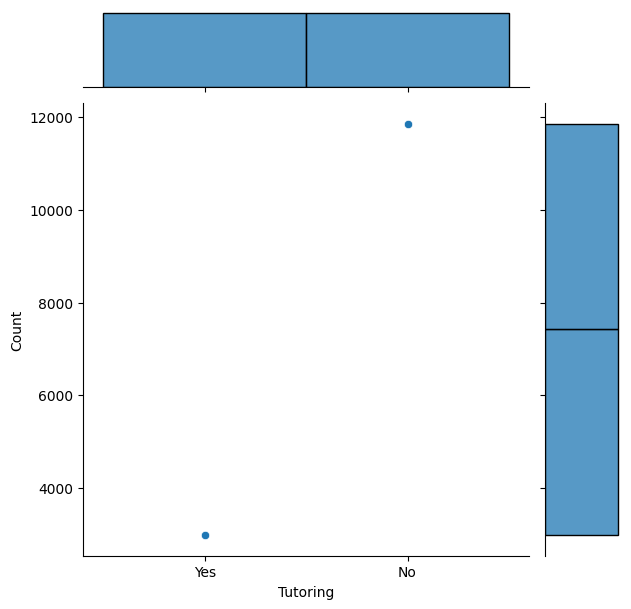

In [56]:
featureName = 'Tutoring' # Replace with interested feature
uniqueClassifiers = {} # Dictionary stores unique entries under column

# Iterates through column
for classifier in df[featureName]:
    if classifier not in uniqueClassifiers:
        uniqueClassifiers[classifier] = 1 # Adds unseen to dictionary
    else:
        uniqueClassifiers[classifier]+=1 # Increments if classifier already seen

# Prints the number of unique features
print(f'Number of unique Entries within {featureName} feature: {len(uniqueClassifiers.keys())}\n')

# Prints the number of entries seen for each class
for classifier in uniqueClassifiers.keys():
    print(f'Number of {classifier} Entries: {uniqueClassifiers[classifier]}')

sns.jointplot(uniqueClassifiers)
#plt.title(featureName)
plt.xlabel(featureName)
plt.ylabel('Count')

**Dummy Coding**

In [57]:
# Converts all Yes and No Entries into 1 and 0 respectively
df.replace(to_replace=['Yes','No'], value=[1,0], inplace=True)
# Converts all academic grades into numerical values
df.replace(to_replace=['A','B','C','D','E','F'], value=[5,4,3,2,1,0], inplace=True)
# Converts all course names into numerical values
df.replace(to_replace=['Chemistry', 'Web Development', 'Geometry', 'Pre-Calculus', 'Java Programming', 'Data Structures', 'Environmental Science', 'Algebra 1', 'Biology', 'Calculus', 'Physics', 'Trigonometry', 'Algebra 2', 'Intro to Python'], value=[13,12,11,10,9,8,7,6,5,4,3,2,1,0], inplace=True)
df.head()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_15436\2129936835.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace=['Yes','No'], value=[1,0], inplace=True)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_15436\2129936835.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace=['A','B','C','D','E','F'], value=[5,4,3,2,1,0], inplace=True)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_15436\2129936835.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futur

,Age_in_Months,Grade,Logins_per_Month,Days_Completed_Activity,Exercises_Started,Total_Time_Spent_in_Minutes,Course_Name,Completion_Rate,Average_Score,Course_Rating,Recommendation_Likelihood,Exercises_Completed,Points_Earned,Subscription_Cost,Subscription_Length_in_Months,Renewal_Status,Tutoring,Referrals,Academic_Grade
0,156,8,6,5,9.784359,107.889381,13,75.330052,86.544412,4,3,7,1910.292936,0.00,4,1,1,0,2
1,202,10,6,6,9.000000,198.865171,12,74.000675,75.937949,4,4,9,1698.767255,0.00,1,1,0,0,0
2,173,9,7,4,12.159345,232.639784,11,73.335360,72.861381,4,4,10,1860.295769,9.99,13,1,0,0,2
3,199,12,17,17,28.000000,506.644691,10,66.872122,70.912510,4,3,28,4465.824908,5.99,11,1,0,1,0
4,148,7,10,8,15.458939,305.275706,9,72.236281,79.714467,4,4,17,2499.211664,9.99,12,1,0,0,0


**What do the correlation coefficients look like?**

<Axes: >

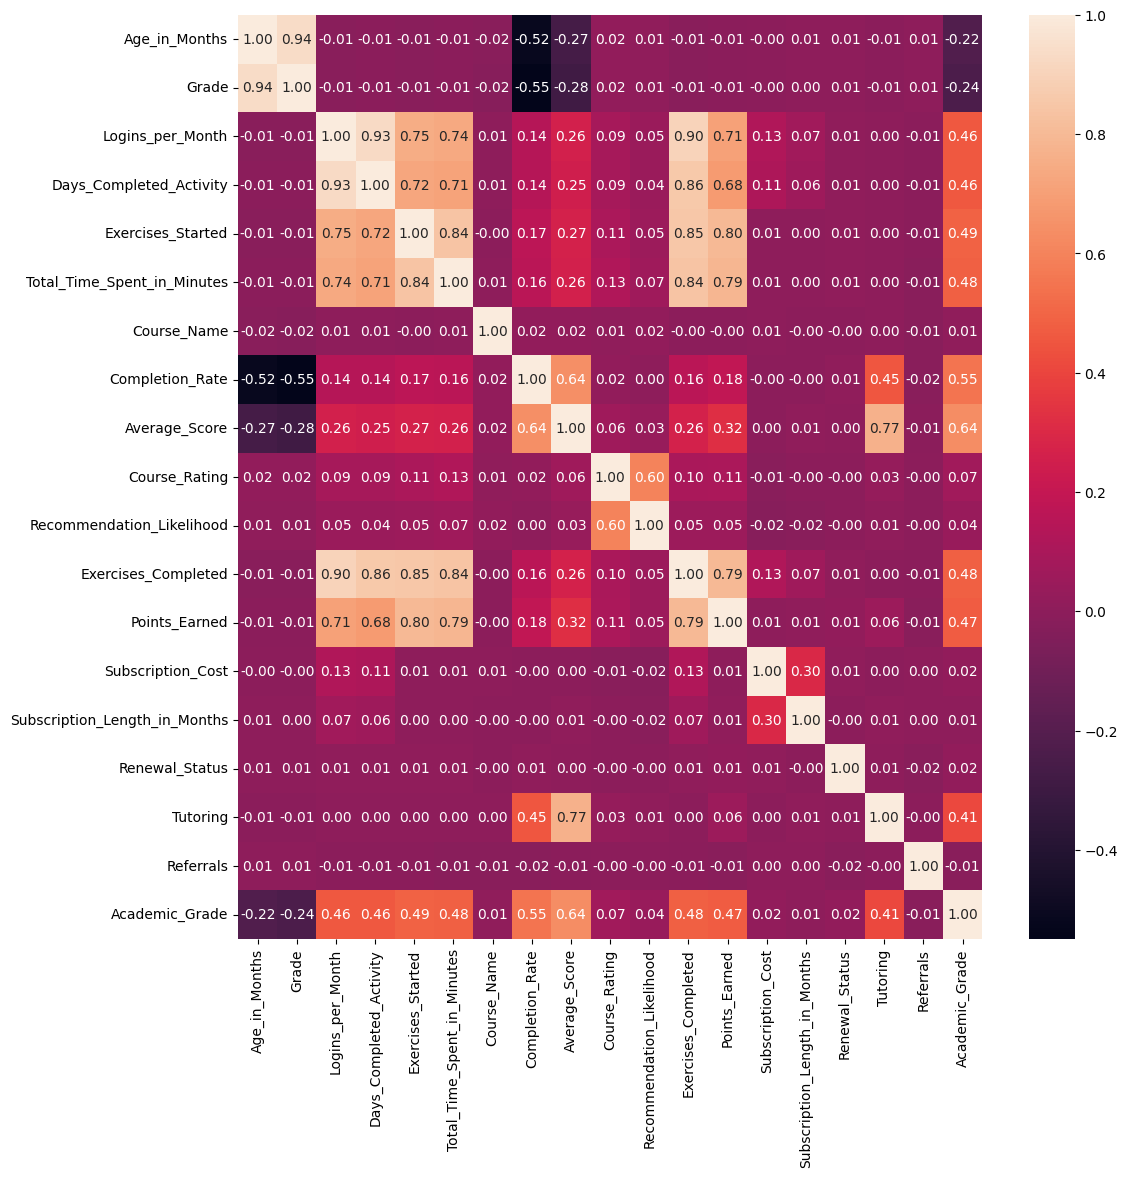

In [58]:
plt.figure(figsize=(12, 12))
corrMatrix = df.corr()
sns.heatmap(
    data=corrMatrix,
    annot=True,
    fmt='.2f'
    )

**What Relationships Does the Data Have?**

## Feature Selection

In [59]:
targetVariable = 'Tutoring' # Replace with target variable
testRatio = 0.2 # Replace with desired test ratio
trees = 100 # Replace with desired number of trees in Random Forest Classifier

#y = df[targetVariable].values # Defines the target variable
#x = df.drop(columns=targetVariable) # Prepares the x variable for stepwise selection

#x = x[['Age_in_Months', 'Exercises_Started','Points_Earned','Renewal_Status']]

domain_knowledge = ['Academic_Grade','Points_Earned','Average_Score','Total_Time_Spent_in_Minutes','Days_Completed_Activity']

In [ ]:
training_set, testing_set = train_test_split(df, test_size=0.2, random_state=0)



x_train = training_set.drop(columns=[targetVariable])
x_test = testing_set.drop(columns=[targetVariable])

x_train_domain = x_train[domain_knowledge]
x_test_domain = x_test[domain_knowledge]

#print(x_train_domain)

y_train = training_set[targetVariable]
y_test = testing_set[targetVariable]

rf = RandomForestClassifier(n_estimators=trees, random_state=0, class_weight='balanced') # Defines the random forest model

rf.fit(x_train_domain,y_train)

y_pred_domain = rf.predict(x_test_domain)
y_prob_domain = rf.predict_proba(x_test_domain)[:,1]

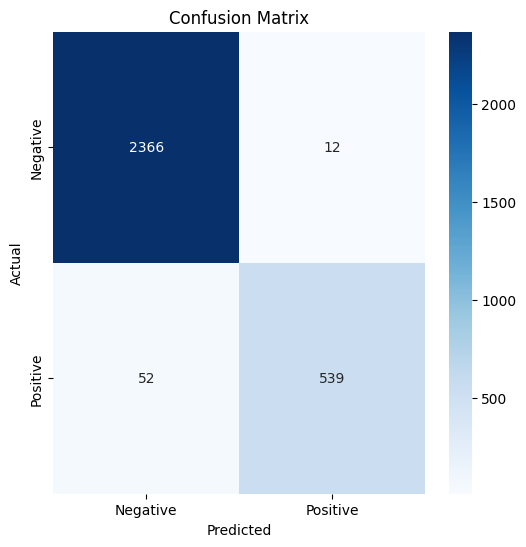

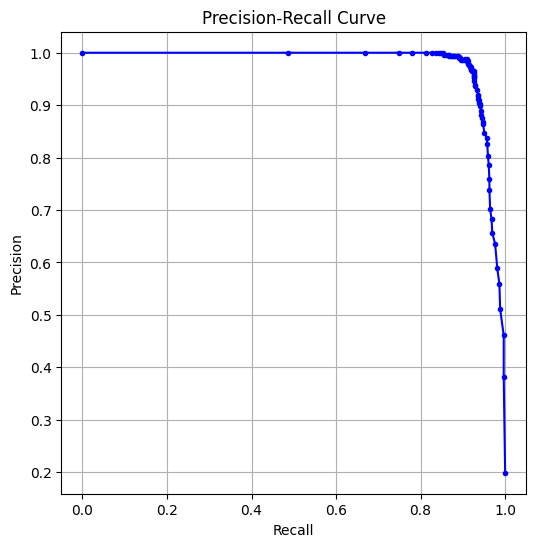

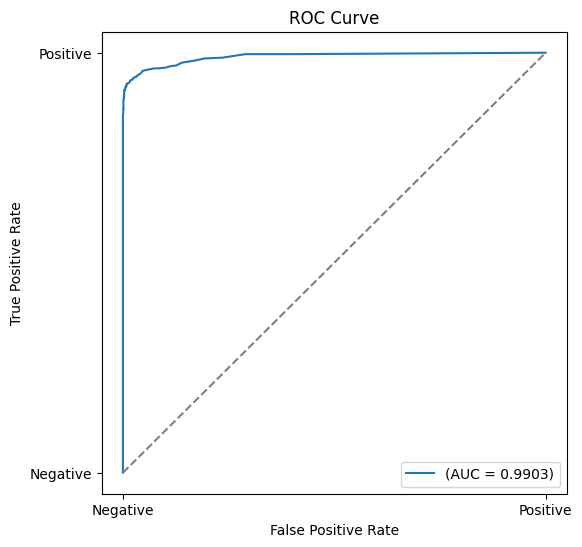

Cross-Validated Training Metrics:
Average balanced_accuracy: 0.9466355917201719
Average average_precision: 0.964911455867135
Average recall_macro: 0.9466355917201719
Average roc_auc: 0.9803158184640649

Testing Metrics:
0.9120135363790186
0.9784439205119568
0.9782214156079855
0.9534836395099466


In [ ]:
confusionMatrix(y_test, y_pred_domain)
plotPrecisionRecall(y_test, y_prob_domain)
plotROC(y_test, y_prob_domain)

print('Cross-Validated Training Metrics:')
crossValidationScore(rf, x_train_domain, y_train)

print('\nTesting Metrics:')

print(f'Accuracy: {accuracy_score(y_test,y_pred_domain)}')
print(f'Recall: {recall_score(y_test,y_pred_domain)}')
print(f'Precision: {precision_score(y_test,y_pred_domain)}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_pred_domain)}')

In [81]:
from ForwardStepwise import ForwardStepwise

training_set[targetVariable] = y_train

fs = ForwardStepwise(training_set, rf, targetVariable, 'average_precision')

model, features, metric = fs.forwardStepwise()

Best Features: ['Logins_per_Month', 'Grade', 'Exercises_Started', 'Average_Score'], Best average_precision: 0.9959192791899485, Comparison Feature: ['Logins_per_Month', 'Grade', 'Exercises_Started', 'Average_Score'], Comparison average_precision: 0.9959192791899485
Best Features: ['Logins_per_Month', 'Grade', 'Exercises_Started', 'Average_Score'], Best average_precision: 0.9959192791899485, Comparison Feature: ['Days_Completed_Activity', 'Grade', 'Exercises_Started', 'Average_Score'], Comparison average_precision: 0.9952641539919671
Best Features: ['Logins_per_Month', 'Grade', 'Exercises_Started', 'Average_Score'], Best average_precision: 0.9959192791899485, Comparison Feature: ['Total_Time_Spent_in_Minutes', 'Grade', 'Exercises_Started', 'Average_Score'], Comparison average_precision: 0.9939304383723429
Best Features: ['Logins_per_Month', 'Grade', 'Exercises_Started', 'Average_Score'], Best average_precision: 0.9959192791899485, Comparison Feature: ['Course_Name', 'Grade', 'Exercises_

In [84]:
x_test_step = x_test[features]

y_pred_step = model.predict(x_test_step)
y_prob_step = model.predict_proba(x_test_step)[:,1]

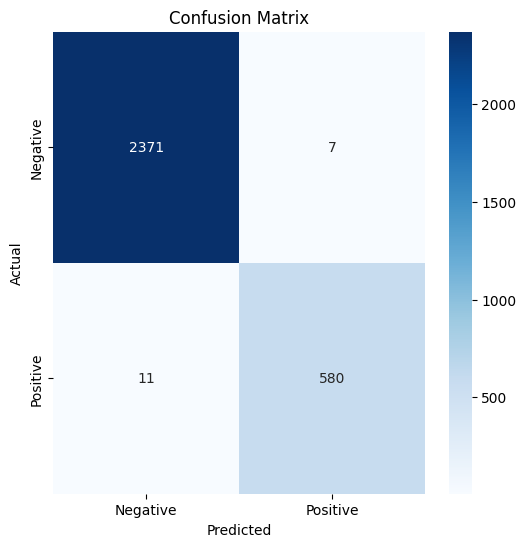

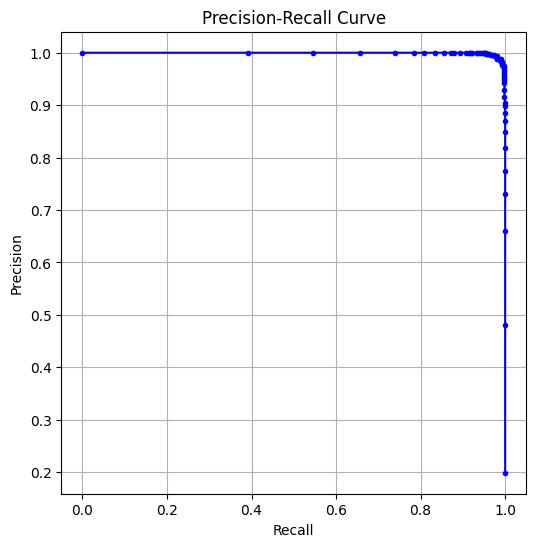

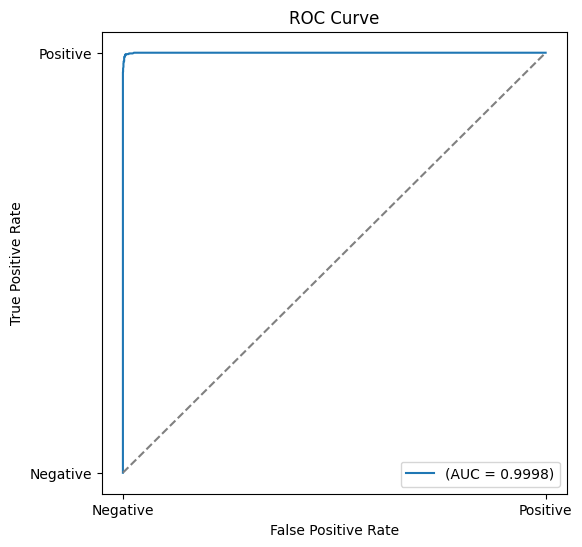


Testing Metrics:
Accuracy: 0.9939373526439879
Recall: 0.9813874788494078
Precision: 0.9880749574105622
ROC_AUC: 0.9892219143616259


In [86]:
confusionMatrix(y_test, y_pred_step)
plotPrecisionRecall(y_test, y_prob_step)
plotROC(y_test, y_prob_step)

print('\nTesting Metrics:')
print(f'Accuracy: {accuracy_score(y_test,y_pred_step)}')
print(f'Recall: {recall_score(y_test,y_pred_step)}')
print(f'Precision: {precision_score(y_test,y_pred_step)}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_pred_step)}')

['Recommendation_Likelihood', 'Subscription_Cost', 'Logins_per_Month', 'Points_Earned', 'Total_Time_Spent_in_Minutes', 'Completion_Rate', 'Grade', 'Exercises_Started', 'Average_Score']
[0.00200294 0.00158819 0.01025616 0.01774778 0.01856364 0.18413146
 0.05370499 0.02074294 0.6912619 ]


Text(0.5, 1.0, 'Feature Proportion Chart')

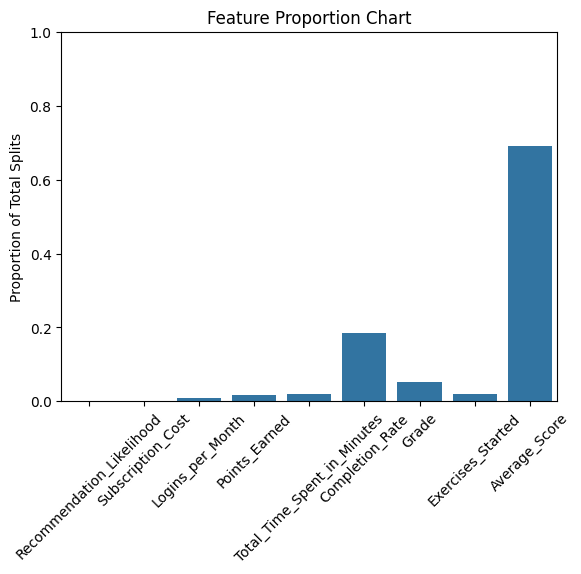

In [87]:
featureProportion = model.feature_importances_

print(features) # Feature Names
print(featureProportion)
sns.barplot(featureProportion)
plt.xticks(ticks=range(len(featureProportion)),labels=features, rotation=45)
plt.ylabel('Proportion of Total Splits')
plt.ylim(0,1)
plt.title('Feature Proportion Chart')

In [88]:
def plotProbability(xVariable, yProb):
    xTrain, xTest= train_test_split(df[xVariable], test_size=testRatio, random_state=0)
    plt.scatter(xTest, yProb)
    plt.xlabel(xVariable)
    plt.ylabel('1-on-1 Probability')
    plt.title(f'1-on-1 Tutoring Probability Based on {xVariable}')
    plt.show()

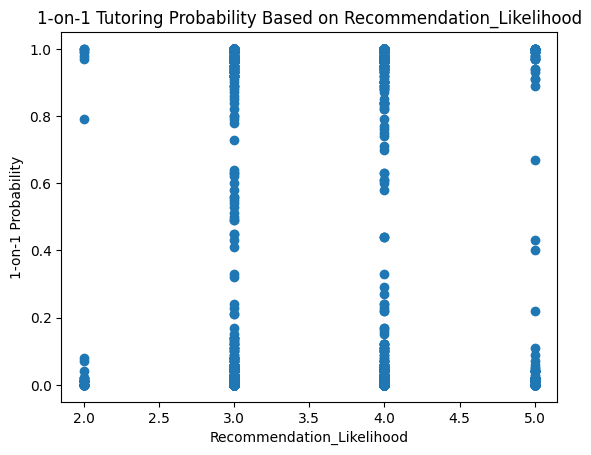

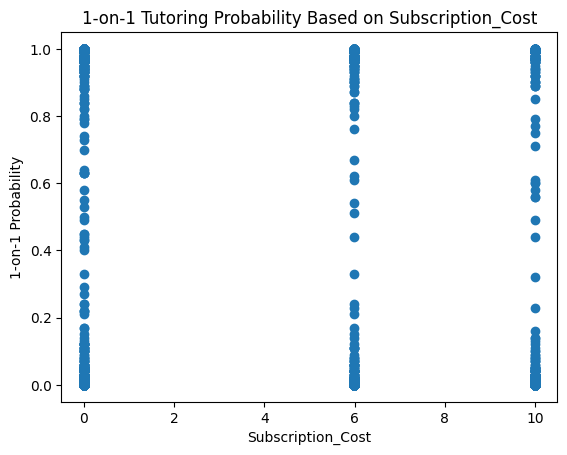

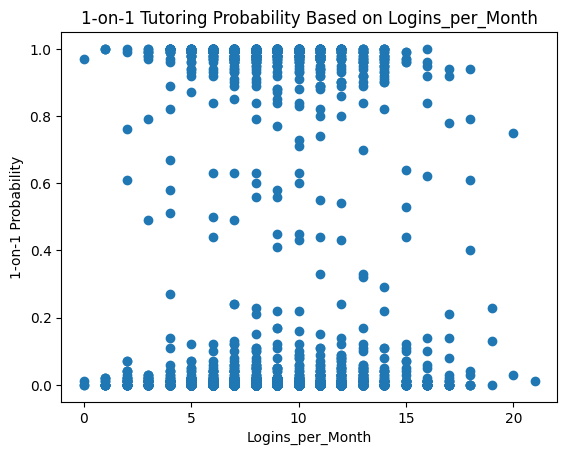

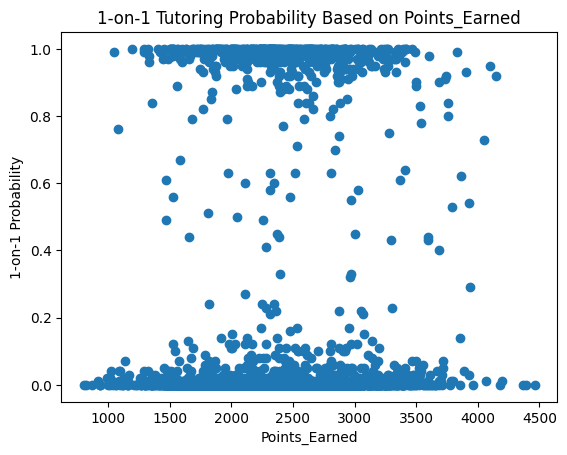

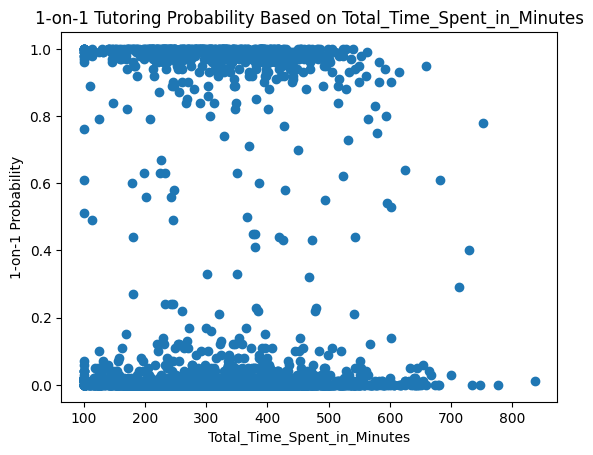

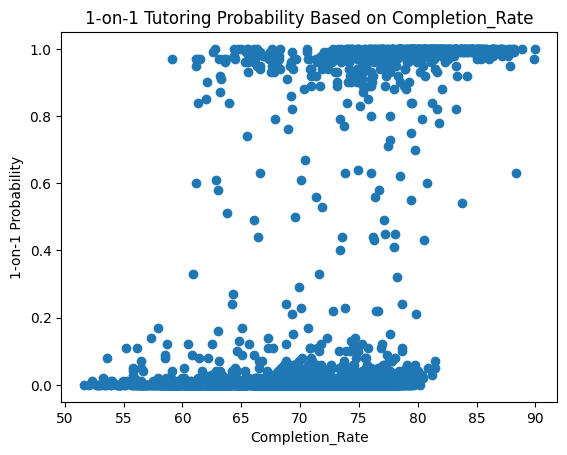

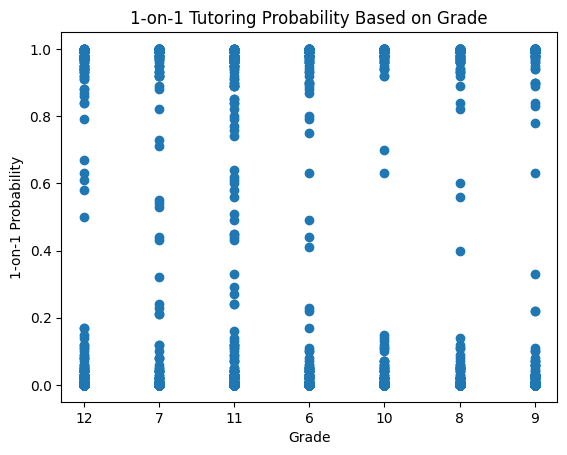

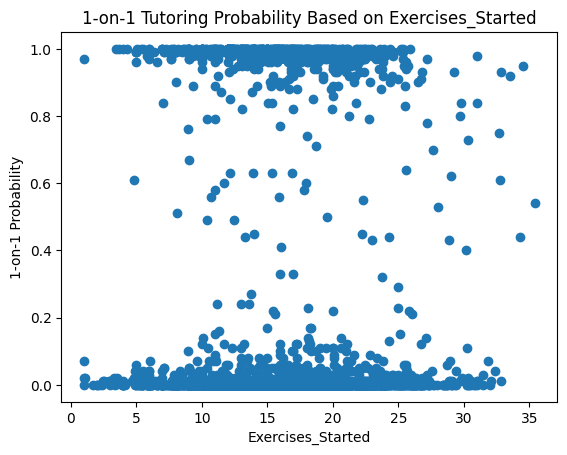

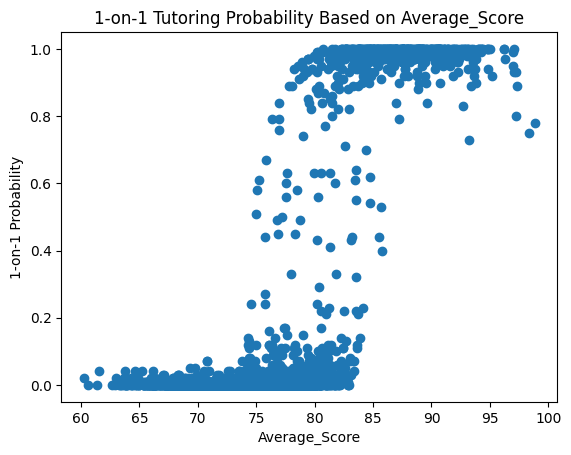

In [89]:
for feature in features:
    plotProbability(feature, y_prob_step)